<a href="https://colab.research.google.com/github/brianyulongzhou/ps2/blob/main/Lab_2_Measurements_and_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Go to `File` $\rightarrow$ `Save a copy in Drive` to save an editable version of this document in your own Google Drive.

## Dealing with Uncertainty

When performing measurements (as in life), there are always sources of uncertainty. Part of your job as an experimentalist to to figure out how certain (or uncertain) you are that you measured the value that you think you measured. Therefore, it is necessary to assign uncertainty values to any measured value!

In this lab, we'll learn where these uncerainty values come from, how to find them, and how to compare values given their uncertainties.


## The Logistics

Edit this cell and add the names of your group memembers here:

>> Lab member 1:

>> Lab member 2:

>> Lab member 3:

* As you go through this document, be sure to answer any questions posed in a text cell where indicated. Your text should be preceeded by the double `>>` as shown above.
* At the end of the lab, you'll download this notebook and then upload it to Canvas/Gradescope *before you leave*. 

Use the Image button <img src="https://drive.google.com/uc?export=view&id=1ozL_-9rAp8tlCr5VHynjrcR5cG_bFCsF" alt="image icon" width="25"/> (visible when editing the cell) to insert a photo of yourselves here. (Keep photos in separate cells, as they take up a lot of room.) Don't spend too long on this - if it takes you more than five minutes to insert a photo, come back and do it at the end of lab.

## Define helper functions

Run the below cell to define a few function we'll be using during this lab!

(you can then hide this cell again)

In [ ]:
#Define helper functions

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['font.size'] = '16'
#from IPython import display
from IPython.display import Latex

def gaussian_profile(x, mean, std):
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-1/2*(x-mean)**2/std**2)

def plot_hist_with_profile(data, bins=None, ax = None):


  fig, ax = plt.subplots(1,1)
  color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

  if (type(data[0]) == list) or isinstance(data[0], np.ndarray):
    alpha = 0.5
  else:
    data = [data]
    alpha = 0.5

  for ii in np.arange(len(data)):

    #if ii == 0:
    _, bins2, _ = ax.hist(data[ii], bins = bins, alpha = alpha, density = True, color = color_cycle[ii])
    #else:
    #ax.hist(data[ii], bins = bins, alpha = alpha)

    binspace = np.diff(bins2).mean()
    xplot = np.linspace(np.min(data[ii]), np.max(data[ii]))
    ax.plot(xplot, gaussian_profile(xplot, np.mean(data[ii]), np.std(data[ii])), '--',  color = color_cycle[ii])


def plot_circle(ax,center,radius,color):
    theta = np.linspace(0,2*np.pi,200)
    xx = radius*np.cos(theta) + center[0]
    yy = radius*np.sin(theta) + center[1]
    ax.plot(xx,yy,color=color,lw=1)

def get_range(xx,yy):
    xmax = np.max(np.abs(xx))
    ymax = np.max(np.abs(yy))

    xmax = np.ceil(xmax)
    ymax = np.ceil(ymax)

    maxint = np.max([xmax,ymax])
    return int(maxint)

def make_dart_plots(xx,yy,colormap):

    # create the plot
    fig,ax = plt.subplots(1,2,figsize=(16,7),sharey=True)

    # scatterplot
    h = ax[0].plot(xx,yy,'rX',markersize=15,alpha = 0.2)

    datarange = get_range(xx,yy)

    edges = np.arange(-datarange-0.5,datarange+1,1)

    # histogram
    h = ax[1].hist2d(xx,yy,bins=edges)

    
    n = int(np.amax(h[0])) + 1
    cmap = plt.get_cmap(colormap,n)
    h = ax[1].hist2d(xx,yy,bins=edges,cmap=cmap)    
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right",size="5%",pad=0.05)

    L = n-1
    delta = L/2/n


    tick_locs = np.arange(delta,L-delta+1,2*delta)
    cbar = fig.colorbar(h[3],cax=cax,ticks=tick_locs)
    cbar.set_label('num of hits')
    tick_labels = np.arange(n)
    cbar.set_ticklabels(np.arange(n))


    # label the plots
    rr = [0.5, 1.5, 4, 5, 7.6, 8.6]
    ax[0].set_ylabel('y coordinate');
    for axis in ax:
        for r in rr:
            if axis == ax[0]:
                color = 'k'
            else:
                color = 'k'
            plot_circle(axis,(0,0),r,color)
            
        axis.set_aspect(1)
        axis.set_xlim(-datarange-0.5,datarange+0.5)
        axis.set_ylim(-datarange-0.5,datarange+0.5)
        axis.set_xlabel('x coordinate')
        axis.set_xticks(range(-datarange,datarange+1))
        axis.set_yticks(range(-datarange,datarange+1))
        axis.tick_params(axis='both', which='major', labelsize=10)

##Sample data

my_pre_data = np.array([[-1.5,-3],[-1,0],[0,0],[3,3],[-5,0],[-3,-3],[0,2],[-4,6],[-2,-2],[0,1],[0,3],[3,1],[0,-2],[4,-6],[1,2],[0,0],
                 [0,0],[-6,-9.5],[-2,3],[0,-6],[0,-9],[-4, 0],[2,5],[0,0],[-2,-6],[1,1],[1,4],[-3,-3],[-4,5],[0,-2],[- 2,2],[2,-4],
                 [0,-4],[3,0],[0, 4],[-1,-1]])

my_post_data = np.array([[0,0],[-2,2], [-2,-2], [1,-2], [-2,10], [6,10], [0,3],[3,5], [1,3],[0,-3],[-2,8],[1,-3],[-1,-1],[1,4],[5,-2],[0,-6], 
                  [-3,3], [-1, 3], [0,1],[-1,-2],[0,-1],[2,2],[2,0],[-1,-4],[2,6],[0,-2],[-1,-2],[0,-1],[-1,6],[3,2],[-4,0],[-2,7],[2,1],
                [0,6],[1,-2],[0,0]])

#Recap + Goals for This Week

Recall that in Lab 1, you investigated if you could get better at hacky sack darts by practicing. First, you came up with a quantitative metric for how good your group was at the game. Most groups calculated the average distance of their hacky sacks from the origin,  $\langle r \rangle$, and used this as their metric. Note: $\langle ... \rangle$ just means the average of that variable. Sometimes classes will call the average of a set of measurements 'mu', $\mu$.

You then measured $\langle r \rangle$ before and after practicing. Many groups then claimed that they got better (or worse) based on if your metric increased or decreased. However, most groups could not tell if this change was or was not significant.

As you saw on the pre-lab activity, **in order to tell if the difference between two measurements is significant, you need to know the uncertainty associated with each measurement**. By comparing the difference between the two values with their uncertainties, you can determine the probability that this difference is due purely to random chance. If this probability is low, then the change could be significant!

## This week, you'll learn how to find the uncertainty associated with a measured quantity. Then, you'll be able to use this uncertainty to determine if the difference between two measurements is or is not significant.

# Uncertanties

Before we think about hacky sack darts, we need to figure out how to assign uncertainties to our measurements. Broadly speaking, there are two factors which limit the precision of our measurements:

1. **The resolution of your instrument.** You can't measure a quantity more precisely than the finest increment of your measurement device. For instances, if your meter stick has increments of 1 mm, you can't measure a length with sub-millimeter precision.

2. **Everything else.** Your measurements are subject to intrinisc, random variations due to a host of physical processes. Perhaps fluctuations in the room temperature cause your meter stick to expand and contract. Perhaps air currents cause variation's in your hacky sack's trajectory as it moves through the air. These processes are often difficult to model, but by taking multiple measurements you can see the resulting variation in your data. 

To determine the uncertainty on your data, you should take repeated measurements of the quantity you're interested. The *average* of these measurements will give you an estimate of the "true" value of the quantity of interested.

If the variation between each measurement is larger than the resolution of your instrument (as is often the case in biological experiments, and in this course), then the uncertainty of the average value is given by the *standard error of the mean*.



# Activity 1: The Height of Uncertainty (or The Uncertainty of Height?)

Here's a simple example. Pick one member of your lab group, and have the other two members of your group measure their height. (If there are only two members in your group, measure a TF or someone from another group!) Record your measurements below, and then run the below cell: Python can easily compute the mean, standard deviation, and standard error in the mean.

In [ ]:
heights = np.array([137, 140]) #put your data here, (in meters)

#find the average height value
mean_height = np.mean(heights)

#find the standard deviation of your data:
std_height = np.std(heights)

#find out how many measurements you made:
N = len(heights)

#find the standard error in the mean of your data
uncert_in_mean = std_height/np.sqrt(N) #write some code to compiute the standard error of the mean!

# Print the results:

display(Latex(f'$\mu = {np.round(mean_height,2) }$'))
display(Latex(f'$\sigma = {np.round(std_height,2)}$'))
display(Latex(f'$\sigma_\mu = {np.round(uncert_in_mean,2)}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Now, answer the following questions!

1. What is your group members height (report this with uncertainty!)

>> *answer here*

2. What is the resolution of your measurement device? (That is, what is the smallest length increment?)

>> *answer here*

3. Is the uncertainty on group member's height larger or smaller than the resolution of your device? Why do you think that is?

>> *answer here*



# Activity 2: Was it Significant?

Now that you understanding how to obtain uncertainties on your data, let's revist your hacky sack data from Lab 1. Copy your pre-practice and post-practice data from Lab 1, and paste it in the cell below:


Data before practice:


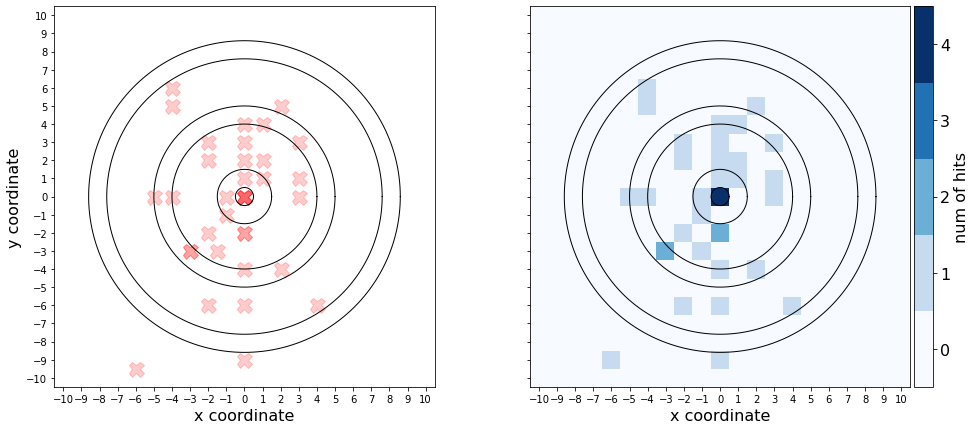


Data after practice:


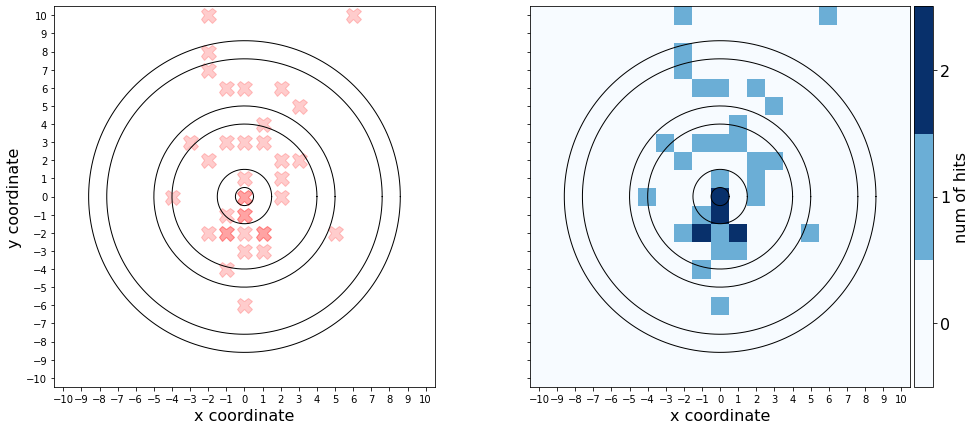

In [ ]:
#my_pre_data = ... #paste your pre-practice data from Lab 1 here
#my_post_data = ... #paste your post-practice data from Lab 1 here

xx_pre, yy_pre = my_pre_data[:,0], my_pre_data[:,1]
xx_post, yy_post = my_post_data[:,0], my_post_data[:,1]

print('Data before practice:')
make_dart_plots(xx_pre, yy_pre, 'Blues')
plt.show()
print('')
print('Data after practice:')
make_dart_plots(xx_post, yy_post, 'Blues')

Now, let's revist your conclusion from last time, but this time we'll be quantative about it! Calculate the average value of $\langle r \rangle$ (or whatever metric you used in Lab 1) from before you practiced, and find the uncertainty in the mean. If you need help setting up these calculations in Python, talk to a TF (or another group!)

In [ ]:
#Compute distance for each data point


#Compute average distance


#Compute number of data points


#Compute standard deviation 


#Compute standard error of the mean


#Print value for mean


#Print value for Standard error of the Mean

Now, calculate the average value of $\langle r \rangle$ (or your metric from Lab 1) from after you practiced, and find the uncertainty in the mean

In [ ]:
#Compute distance for each data point


#Compute average distance


#Compute number of data points


#Compute standard deviation 


#Compute standard error of the mean


#Print value for mean


#Print value for Standard error of the Mean

Finally, compare your pre and post practice values using the comparision test, described in the pre-activity. Also, plot a histogram of the pre and post practice data.

In [ ]:
ct = ... #perform a comparision test between the pre/post-practice distances

plt.hist(...) #plot a histogram of the pre/post-practice distances

## Activity 2 questions

After performing the calculations above, interpret your value!

1. Is the change in your metric significant? Explain why or why not below. 

>> *your answer here*

2. Describe the histograms of the two data sets. Do the histograms make sense, given the value of your comparision test? Explain why or why not.

>> *your answer here*

Discuss your findings with a TF.

# Activity 3: Reaction Time

Now, let's change gears and ask a new question: Who in your group has the fastest reaction time? To figure this out, we'll do the following experiment:

One group member will be the ‘tester’ and hold a ruler just above the hand of the person reacting. The ‘reactor’ will hold their hand just below the 0 cm on the ruler, ready to pinch or catch the ruler. The tester will drop the ruler without warning, and the reactor will catch the ruler.

In lecture, we saw that the distance an object falls is related to the time it is falling:

$$y = \frac12 gt^2$$

So, by measuring the distance the ruler fell, you can determine how long it was falling!

Start by testing one group member's reaction time. Using the methods from before, figure out how far the ruler falls, with uncertainty.

In [ ]:
y = np.array([...]) #your data here


## Calculate average y


## Calculate uncertainty of the mean



## Now that we know $y$ and it's uncertainty, how do we find $t$ and it's uncertainty? 

###  Error propagation
When you can’t directly measure the thing you’re actually interested in, you must follow a process called “error propagation.” 

For some operations, error propagation is straightforward (e.g. if you double your measured value--you had better double your error bars). But what if you want to square, or take the log of, your measured value? Error propagation can be generalized to *any* function $f$ of your measured value $x_0$ by multiplying your uncertainty by the slope of the applied function at each data point:

$$\delta f(x_0) = \left\vert \frac{df(x)}{dx} \right\vert _{x=x_0} \delta x$$


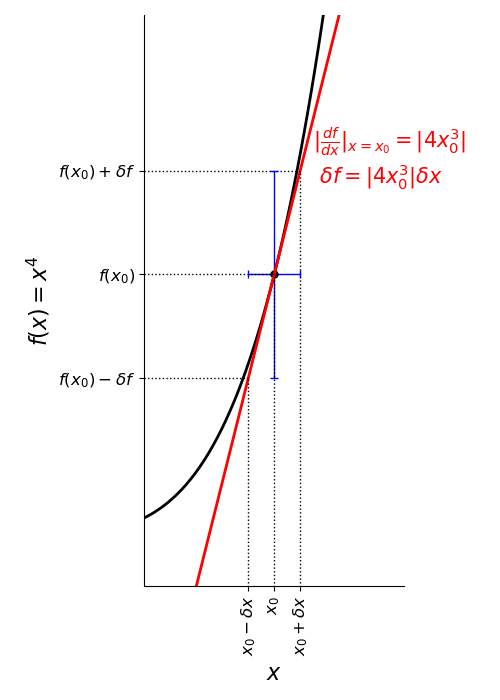

It looks complicated, but once you have computed your (partial) derivatives on paper, it's easy to get Python to do the heavy lifting on this operation. 



## Activity 3 questions
**Propagate error**

Now that we know how to propogate errors, calculate $t$ and it's uncertainty below. (If you need help finding a derivative or calculating in Python, ask a TF for help!)

In [ ]:
#calculate t from y, using the kinetmatic equation
t = ... 

#calculate the uncertainty on t, using error propogation
delta_t = ... 

**Now, measure the rest of your group's reaction times using the same technique! Is your difference in reaction times significant?**

Put any data and/or code in the cell below, and explain your results in the cell below that. Feel free to add additional cells as well.

In [ ]:
#Code here

>> Explain your results here

How to submit

- Go to `File` $\rightarrow$ `Download` $\rightarrow$ `Download .ipynb` 
- Upload the file via the Canvas assignment (it will take you to Gradescope.)
- IMPORTANT: Only upload ONE COPY, making sure to add all group members to the submission!
-Please complete the Lab 1 Post-Lab Survey (on Canvas) before you leave lab!